In [193]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
from scipy import misc
from astropy.modeling.blackbody import blackbody_lambda
import astropy.units as u
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [76]:
files_deneb = []
files_mirphak = []
files_mirach = []
files_aldebaran = []
os.chdir('/Users/sidneylower/Downloads/groupD_star_SPECTRA_20171106/')
for file in glob.glob('deneb*.bmp'):
    files_deneb.append(file)
for file in glob.glob('mirphak*.bmp'):
    files_mirphak.append(file)
for file in glob.glob('mirach*.bmp'):
    files_mirach.append(file)
for file in glob.glob('aldebaran*.bmp'):
    files_aldebaran.append(file)

In [77]:
files_kr = []
files_hg = []
files_ne = []
for file in glob.glob('*kr*.bmp'):
    files_kr.append(file)
for file in glob.glob('*hg*.bmp'):
    files_hg.append(file)
for file in glob.glob('*ne_*.bmp'):
    files_ne.append(file)

In [78]:
kr_data_array = []
hg_data_array = []
ne_data_array = []
for image in files_kr:
    kr_data_array.append(misc.imread(image, flatten=1))
for image in files_hg:
    hg_data_array.append(misc.imread(image, flatten=1))
for image in files_ne:
    ne_data_array.append(misc.imread(image, flatten=1))

In [79]:
deneb_data_array = []
mirphak_data_array = []
mirach_data_array = []
aldebaran_data_array = []
for image in files_deneb:
    deneb_data_array.append(misc.imread(image, flatten=1))
for image in files_mirphak:
    mirphak_data_array.append(misc.imread(image, flatten=1))
for image in files_mirach:
    mirach_data_array.append(misc.imread(image, flatten=1))
for image in files_aldebaran:
    aldebaran_data_array.append(misc.imread(image, flatten=1))

In [163]:
#darks
dark_files_3s = []
dark_files_9s = []
dark_files_8s = []
dark_files_20s = []
for file in glob.glob('dark_3s*.bmp'):
    dark_files_3s.append(file)
for file in glob.glob('dark_9s*.bmp'):
    dark_files_9s.append(file)
for file in glob.glob('dark_8s*.bmp'):
    dark_files_8s.append(file)
for file in glob.glob('dark_20p5*.bmp'):
    dark_files_20s.append(file)

In [164]:
#dark images open
dark_images_3 = []
dark_images_9 = []
dark_images_8 = []
dark_images_20 = []
for image in dark_files_3s:
    dark_images_3.append(misc.imread(image, flatten=1))
for image in dark_files_9s:
    dark_images_9.append(misc.imread(image, flatten=1))
for image in dark_files_8s:
    dark_images_8.append(misc.imread(image, flatten=1))
for image in dark_files_20s:
    dark_images_20.append(misc.imread(image, flatten=1))

In [82]:
#flats
flat_files = []
for file in glob.glob('flat*.bmp'):
    flat_files.append(file)

In [83]:
#open flats
flat_images = []
for image in flat_files:
    flat_images.append(misc.imread(image, flatten=1))

In [182]:
#first, create flat and dark frames

dark_median_3 = np.median(dark_images_3, axis=0)
dark_median_9 = np.median(dark_images_9, axis=0)
dark_median_8 = np.median(dark_images_8, axis=0)
dark_median_20 = np.median(dark_images_20, axis=0)


flat_dark_applied = []
for image in flat_images:
    flat_dark_applied.append(image - dark_median_20)

flat_median = np.median(flat_dark_applied, axis=0)

flat_median /= np.mean(flat_median)

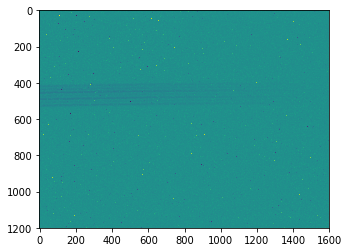

In [183]:
plt.imshow(flat_median)

## Wavelength Calibration

In [85]:
#calculate wavelength sol for CCD using lamps

#kr --> can only use one of each lamp exposure since it drifts 
kr_lamp = kr_data_array[1]

kr_selection = kr_lamp[390:550, :]
flat_kr = np.median(kr_selection - np.median(kr_lamp), axis=0)
norm_kr = (flat_kr / np.max(flat_kr))[::-1]

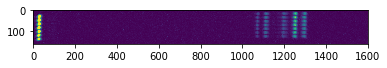

In [86]:
plt.imshow(kr_lamp[390:550, :])

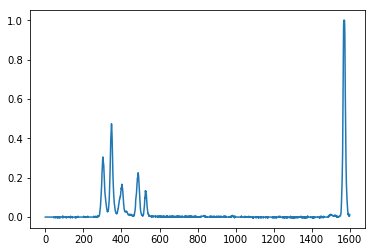

In [87]:
plt.plot(norm_kr)

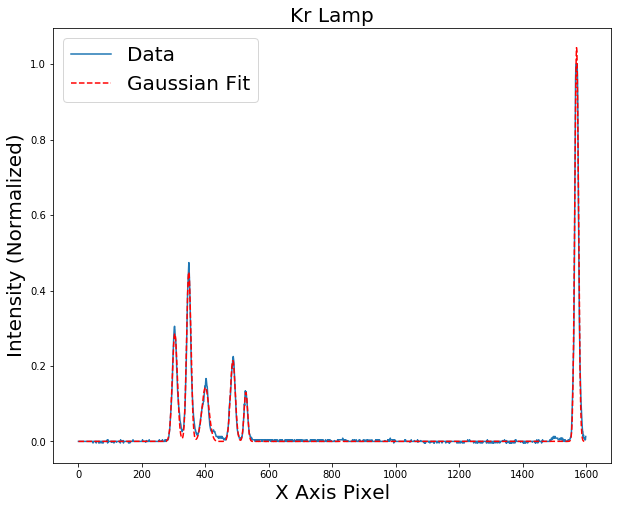

In [88]:
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 8))

#x_pixels_first_line = np.arange(370, 390,1.0)
#x_pixels_sec_line = np.arange(510, 550, 1.0)

x_kr = np.arange(0, len(norm_kr), 1.0)


def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2,mu3,A3,sigma3,mu4,A4,sigma4,mu5,A5,sigma5,mu6,A6,sigma6):
    return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2) + gaussian(x,mu3,A3,sigma3) + gaussian(x,mu4,A4,sigma4) + gaussian(x,mu5,A5,sigma5) + gaussian(x,mu6,A6,sigma6)

expected = (300, 0.3, 5, 350, 0.5, 5, 400, 0.2, 5, 500, 0.25, 5, 520, 0.15, 5, 1570, 1.0, 10)
params_kr,cov_kr = curve_fit(gauss_sum, x_kr, norm_kr, expected)

fit_kr = gauss_sum(x_kr, *params_kr)
plt.plot(x_kr, norm_kr, label='Data')

plt.plot(x_kr, fit_kr, color='red', ls = '--', lw = 1.5, label='Gaussian Fit')
#plt.legend(fontsize=20, frameon=False)

plt.ylabel('Intensity (Normalized)', fontsize=20)
plt.xlabel('X Axis Pixel', fontsize=20)
plt.title("Kr Lamp", fontsize=20)



plt.legend(loc='upper left', fontsize=20)

#plt.annotate("405 nm", xy=(40, 0.17), fontsize=15)
#plt.annotate("436 nm", xy=(400, 0.8), fontsize=15)
#plt.annotate("546 nm", xy=(1200, 0.8), fontsize=15)

In [89]:
#fit centroids
centroids_kr = params_kr[::3]
#wavelengths actual nm
wavs_kr = [431.958, 436.9, 439.997, 445.8805, 450.235, 557.029]

In [90]:
#wavelength solution

coefs = np.polyfit(centroids_kr, wavs_kr, deg=3)
wavelength_sol = np.poly1d(coefs)

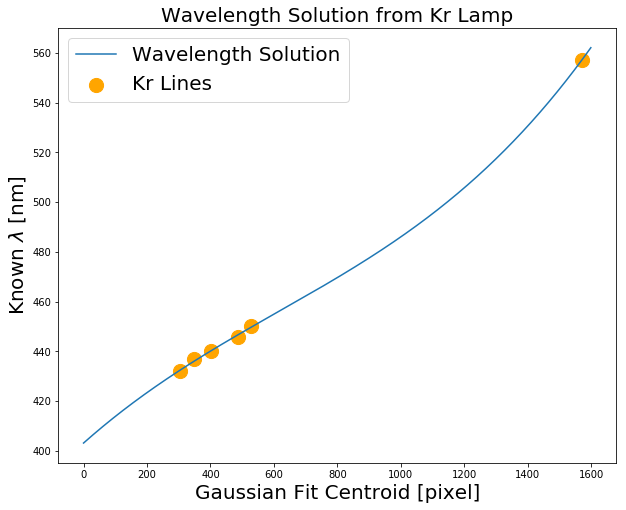

In [91]:
plt.figure(figsize=(10, 8))
plt.scatter(centroids_kr, wavs_kr, color='orange', s=200, label='Kr Lines')
plt.plot(x_kr, wavelength_sol(x_kr), label='Wavelength Solution')
##plt.ylim([390, 570])
#plt.xlim([-50, 1650])
plt.xlabel('Gaussian Fit Centroid [pixel]', fontsize=20)
plt.ylabel('Known $\lambda$ [nm]', fontsize=20)
plt.title("Wavelength Solution from Kr Lamp", fontsize=20)
plt.legend(fontsize=20)

Text(0.5,1,'Kr Fit Residuals')

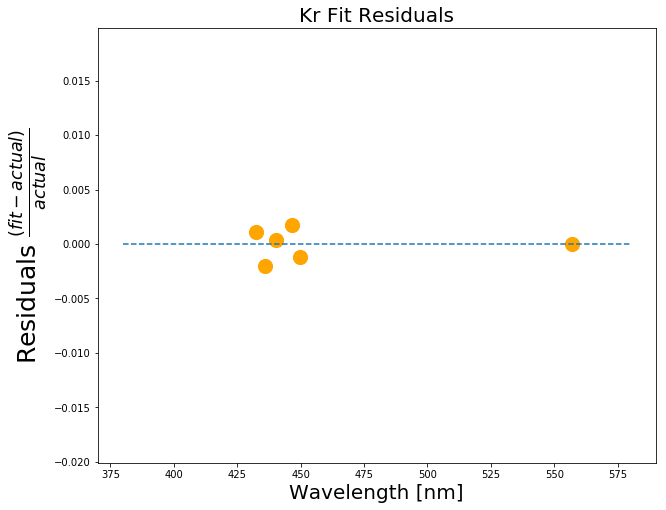

In [92]:

fit_wavs_kr = wavelength_sol(centroids_kr)
residuals_kr = (fit_wavs_kr - wavs_kr) / wavs_kr

plt.figure(figsize=(10, 8))
plt.scatter(fit_wavs_kr, residuals_kr, color='orange', s=200, label='Residuals')
plt.plot([380, 580], [0, 0], ls='--', lw=1.5)
plt.xlabel("Wavelength [nm]", fontsize=20)
plt.ylabel(r"Residuals $\frac{(fit - actual)}{actual}$", fontsize=25)
#plt.ylim([-0.0006, 0.0006])
#plt.xlim([-20, 1620])
plt.title("Kr Fit Residuals", fontsize=20)

In [93]:
residuals_kr

array([ 1.12205493e-03, -2.02172240e-03,  3.28890773e-04,  1.78190914e-03,
       -1.20201646e-03,  1.02382871e-06])

In [94]:
#hg --> can only use one of each lamp exposure since it drifts 
hg_lamp = hg_data_array[0]

hg_selection = hg_lamp[380:550, :]
flat_hg = np.median(hg_selection - np.median(hg_lamp), axis=0)
norm_hg = (flat_hg / np.max(flat_hg))[::-1]

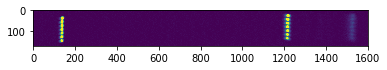

In [95]:
plt.imshow(hg_selection)

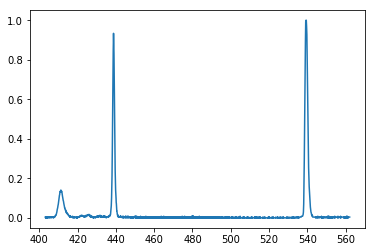

In [96]:
x_hg = np.arange(0, len(norm_hg))
wavs_hg = wavelength_sol(x_hg)
plt.plot(wavs_hg, norm_hg)

Text(500,0.8,'Actual = 546 nm\nFit = 539 nm')

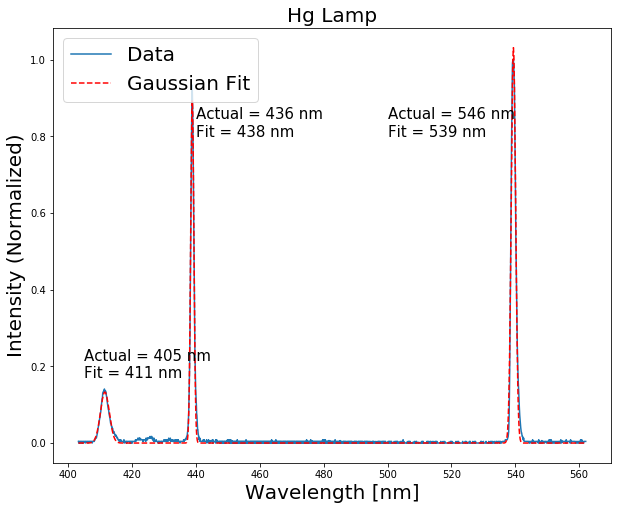

In [97]:
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 8))


def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2,mu3,A3,sigma3):
    return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2) + gaussian(x,mu3,A3,sigma3)

expected = (410, 0.2, 5, 438, 1.0, 10, 538, 1.0, 10)
params_hg,cov_hg = curve_fit(gauss_sum, wavs_hg, norm_hg, expected)

fit_hg = gauss_sum(wavs_hg, *params_hg)
plt.plot(wavs_hg, norm_hg, label='Data')
plt.plot(wavs_hg, fit_hg, color='red', ls = '--', lw = 1.5, label='Gaussian Fit')
#plt.legend(fontsize=20, frameon=False)

plt.ylabel('Intensity (Normalized)', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title("Hg Lamp", fontsize=20)



plt.legend(loc='upper left', fontsize=20)

plt.annotate("Actual = 405 nm\nFit = 411 nm", xy=(405, 0.17), fontsize=15)
plt.annotate("Actual = 436 nm\nFit = 438 nm", xy=(440, 0.8), fontsize=15)
plt.annotate("Actual = 546 nm\nFit = 539 nm", xy=(500, 0.8), fontsize=15)

In [98]:
#pixel corresponding to fitted peak of emission line
centroids_hg = params_hg[::3]
#wavelength (nm) corresponding to peak of emission line, from standard spectrum of hg
wavs_hg = [405, 436, 546]

In [99]:
centroids_hg

array([411.45648254, 438.83847446, 539.4149496 ])

Text(0.5,1,'Hg Fit Residuals')

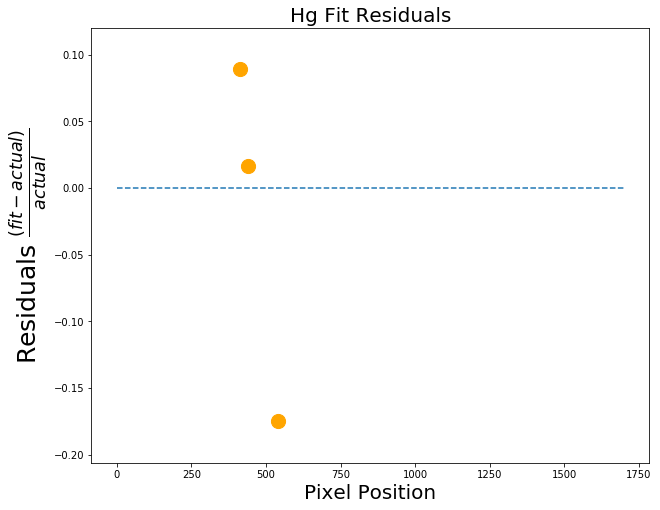

In [100]:

fit_wavs_hg = wavelength_sol(centroids_hg)
residuals_hg = (fit_wavs_hg - wavs_hg) / wavs_hg

plt.figure(figsize=(10, 8))
plt.scatter(centroids_hg, residuals_hg, color='orange', s=200, label='Residuals')
plt.plot([0, 1700], [0, 0], ls='--', lw=1.5)
plt.xlabel("Pixel Position", fontsize=20)
plt.ylabel(r"Residuals $\frac{(fit - actual)}{actual}$", fontsize=25)
#plt.ylim([-0.0006, 0.0006])
#plt.xlim([-20, 1620])
plt.title("Hg Fit Residuals", fontsize=20)

## Image Reduction, Spectral Calibration, & Stellar Classification

In [187]:
#now star image reduction

#to remove telluric lines, define Deneb as the standard and calibrate every other star spectrum by its

#reduce each deneb spectrum then add
dark_removed_deneb = []
for image in deneb_data_array:
    dark_removed_deneb.append(image - dark_median_3)
flattened_deneb = []
for image in dark_removed_deneb:
    flattened_deneb.append(image / flat_median)
    
    
combined_deneb = np.sum(dark_removed_deneb, axis=0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


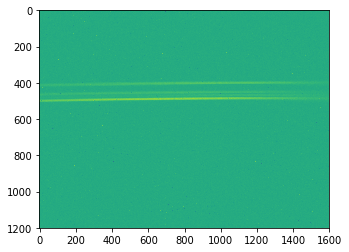

In [188]:
plt.imshow(combined_deneb)

In [189]:
deneb_selection = combined_deneb[375:520, :]

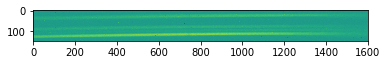

In [190]:
plt.imshow(deneb_selection)

In [174]:
deneb_spec = np.sum(deneb_selection, axis=0)[::-1]

Text(435,3750,'H$\\gamma$')

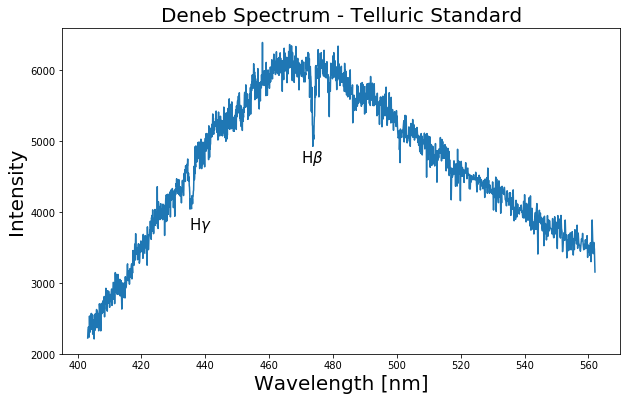

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(wavelength_sol(np.arange(len(deneb_spec))), deneb_spec)
plt.title('Deneb Spectrum - Telluric Standard', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)

plt.annotate(r'H$\beta$', xy=(470, 4700), fontsize=15)
plt.annotate(r'H$\gamma$', xy=(435, 3750), fontsize=15)

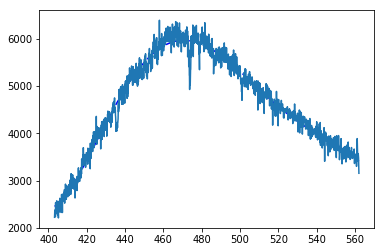

In [176]:
import numpy.polynomial.polynomial as poly
deneb_coefs = poly.polyfit(wavelength_sol(np.arange(len(deneb_spec))), deneb_spec,5)
deneb_fit = poly.polyval(wavelength_sol(np.arange(len(deneb_spec))), deneb_coefs)
plt.plot(wavelength_sol(np.arange(len(deneb_spec))), deneb_fit, ls='--', color='blue', lw=1.5)
plt.plot(wavelength_sol(np.arange(len(deneb_spec))), deneb_spec)

In [108]:
deneb_diff = deneb_spec - deneb_fit

In [270]:
wav_range_hb = np.arange(511, 517, 0.1)

In [271]:
def equivalent_width(x):
    eq = 0.0
    for i in x:
        eq += 1.0 - (mirach_calib[(np.abs(wavelength_sol(np.arange(len(deneb_spec))) - i)).argmin()]/mirach_fit[(np.abs(wavelength_sol(np.arange(len(deneb_spec))) - i)).argmin()])
    return eq

In [272]:
eq_w_hb = np.sum(equivalent_width(wav_range_hb))

In [273]:
eq_w_hb

1.1458002030600836

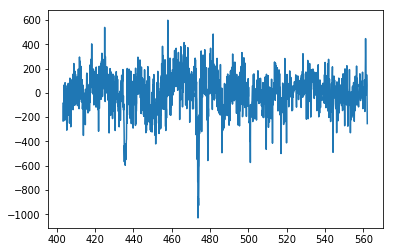

In [109]:
plt.plot(wavelength_sol(np.arange(len(deneb_spec))), deneb_diff)

Text(430,-720,'Fit $\\lambda$ = 435 nm')

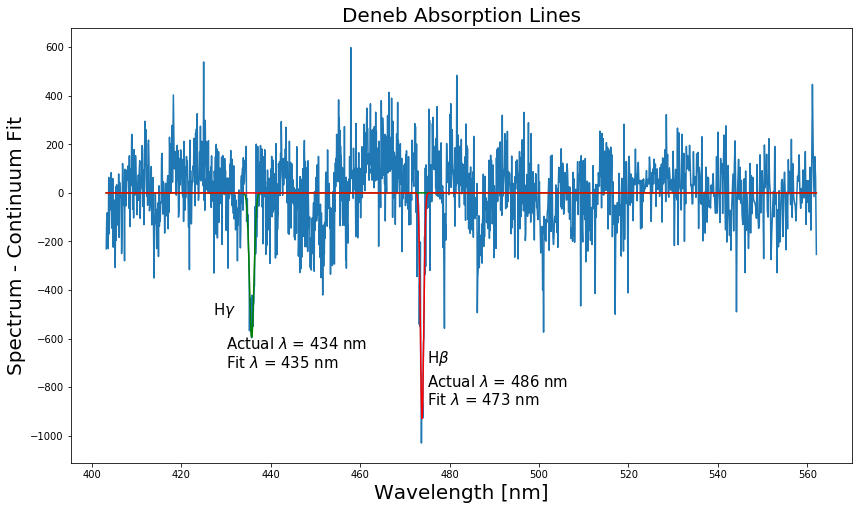

In [110]:
plt.figure(figsize=(14, 8))

x_deneb = wavelength_sol(np.arange(len(deneb_spec)))


def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2):
    return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2)

expected1 = (435, -600 , 2)
expected2 = (475, -1000, 1)
params_den1,cov_den1 = curve_fit(gaussian, x_deneb, deneb_diff, expected1)
params_den2,cov_den2 = curve_fit(gaussian, x_deneb, deneb_diff, expected2)

fit_den1 = gaussian(x_deneb, *params_den1)
fit_den2 = gaussian(x_deneb, *params_den2)
#plt.plot(x_al, fit_al1+fit_al2+fit_al3, color='red', ls = '--', lw = 1.5, label='Gaussian Fit')

plt.plot(x_deneb, deneb_diff, label='Data')
plt.plot(x_deneb, fit_den1, color='green')
plt.plot(x_deneb, fit_den2, color='red')

plt.ylabel('Spectrum - Continuum Fit', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title('Deneb Absorption Lines', fontsize=20)

plt.annotate(r'H$\beta$', xy=(475, -700), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 486 nm', xy=(475, -800), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 473 nm', xy=(475, -870), fontsize=15)
plt.annotate(r'H$\gamma$', xy=(427, -500), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 434 nm', xy=(430, -640), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 435 nm', xy=(430, -720), fontsize=15)

In [215]:
params_den2

array([ 4.73838010e+02, -9.29370608e+02, -5.29790197e-01])

In [112]:
#now try to reduce aldebaran and calibrate with deneb

dark_removed_aldebaran = []
for image in aldebaran_data_array:
    dark_removed_aldebaran.append(image - dark_median_3)
flattened_aldebaran = []
for image in dark_removed_aldebaran:
    flattened_aldebaran.append(image / flat_median)
    
    
combined_aldebaran = np.sum(dark_removed_aldebaran, axis=0)



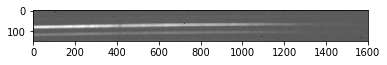

In [113]:
plt.imshow(combined_aldebaran[375:520, :], cmap='gray')

In [114]:
aldebaran_selection = combined_aldebaran[375:520, :]

In [115]:
aldebaran_spec = np.sum(aldebaran_selection, axis=0)[::-1]

Text(0.5,0,'Wavelength [nm]')

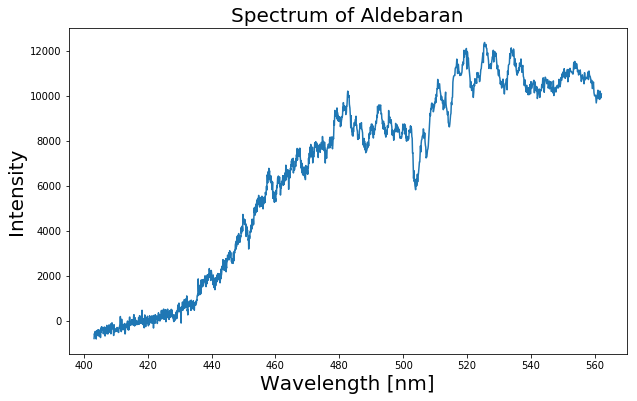

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(wavelength_sol(np.arange(len(aldebaran_spec))), aldebaran_spec)
plt.title("Spectrum of Aldebaran", fontsize=20)
plt.ylabel("Intensity", fontsize=20)
plt.xlabel("Wavelength [nm]", fontsize=20)

In [148]:
aldebaran_divided = np.divide(aldebaran_spec, deneb_spec)

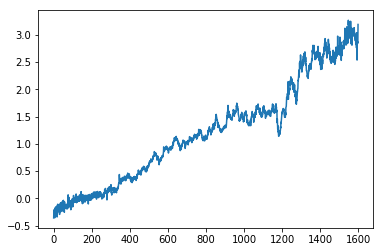

In [118]:
plt.plot(aldebaran_divided)

In [119]:
aldebaran_wav = wavelength_sol(np.arange(len(aldebaran_divided)))
#wav = np.arange(100, 5e3)

deneb_bb = blackbody_lambda(aldebaran_wav*u.nm, 8525*u.K)


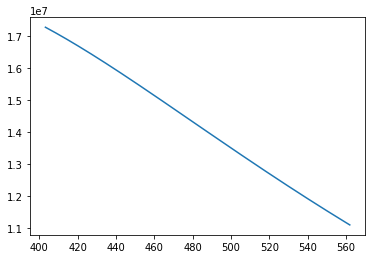

In [120]:
plt.plot(aldebaran_wav, deneb_bb.value)
#plt.semilogy()
#plt.yscale('log')
#plt.ylim(1e5, 1e8)

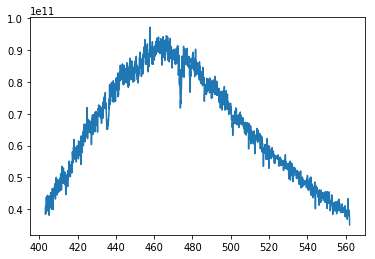

In [275]:
plt.plot(aldebaran_wav, deneb_bb.value*deneb_spec)

Text(0.5,0,'Wavelength [nm]')

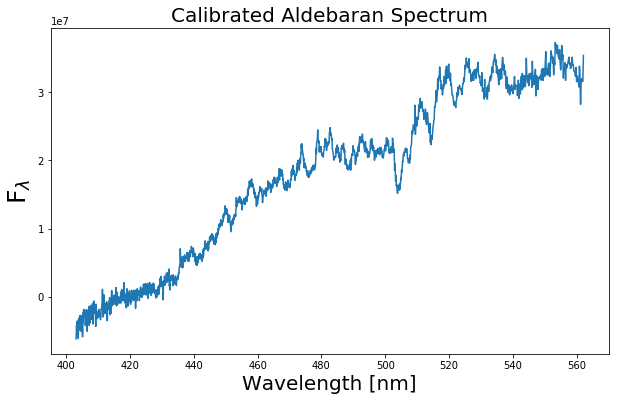

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(aldebaran_wav, aldebaran_calib)
plt.title("Calibrated Aldebaran Spectrum", fontsize=20)
plt.ylabel('F$_{\lambda}$', fontsize=25)
plt.xlabel("Wavelength [nm]", fontsize=20)

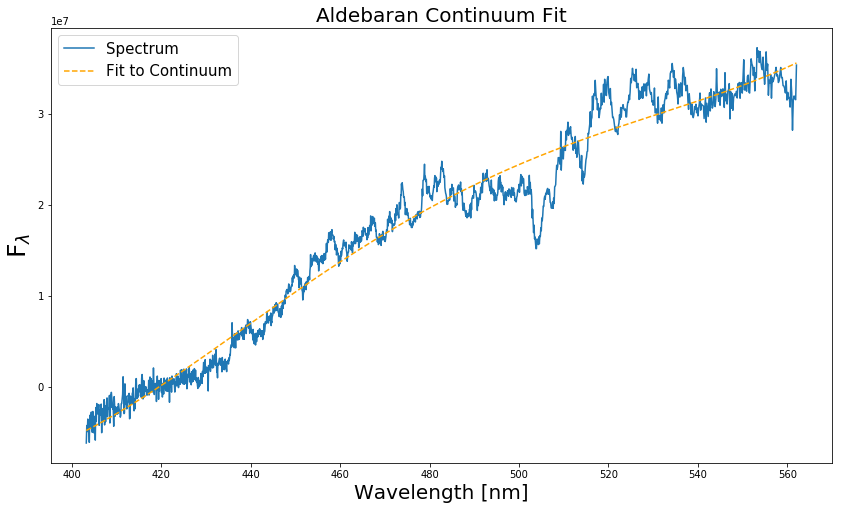

In [264]:
#remove continuum to measure centroids of absorption features
import numpy.polynomial.polynomial as poly
al_coefs = poly.polyfit(aldebaran_wav, aldebaran_calib,4)
al_fit = poly.polyval(aldebaran_wav, al_coefs)
plt.figure(figsize=(14, 8))
plt.plot(aldebaran_wav, aldebaran_calib, label='Spectrum')
plt.plot(aldebaran_wav, al_fit, ls='--', color='orange', lw=1.5, label='Fit to Continuum')
plt.ylabel(r'F$_\lambda$', fontsize=25)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title('Aldebaran Continuum Fit', fontsize=20)
plt.legend(loc='upper left', fontsize=15)

In [151]:
al_diff = aldebaran_calib - al_fit

Text(455,-3e+06,'Fit $\\lambda$ = 476 nm')

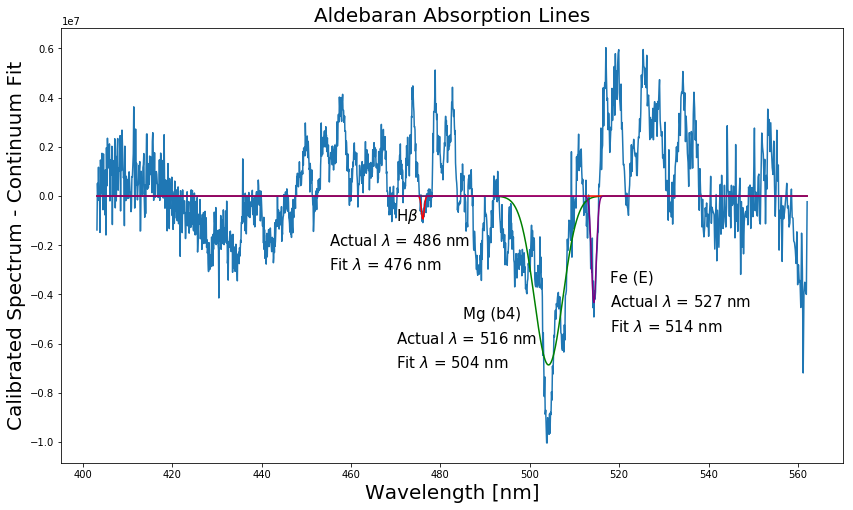

In [152]:
plt.figure(figsize=(14, 8))

x_al = aldebaran_wav


def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2,mu3,A3,sigma3):
    return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2) + gaussian(x,mu3,A3,sigma3)

expected1 = (505, -1.0e7 , 1)
expected2 = (475, -0.1e7, 0.5)
expected3 = (515, -0.5e7, 1)
params_al1,cov_al1 = curve_fit(gaussian, x_al, al_diff, expected1)
params_al2,cov_al2 = curve_fit(gaussian, x_al, al_diff, expected2)
params_al3,cov_al3 = curve_fit(gaussian, x_al, al_diff, expected3)

fit_al1 = gaussian(x_al, *params_al1)
fit_al2 = gaussian(x_al, *params_al2)
fit_al3 = gaussian(x_al, *params_al3)
#plt.plot(x_al, fit_al1+fit_al2+fit_al3, color='red', ls = '--', lw = 1.5, label='Gaussian Fit')

plt.plot(aldebaran_wav, al_diff, label='Data')
plt.plot(x_al, fit_al1, color='green')
plt.plot(x_al, fit_al2, color='red')
plt.plot(x_al, fit_al3, color='purple')

plt.ylabel('Calibrated Spectrum - Continuum Fit', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title('Aldebaran Absorption Lines', fontsize=20)

plt.annotate('Mg (b4)', xy=(485, -0.5e7), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 516 nm', xy=(470, -0.6e7), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 504 nm', xy=(470, -0.7e7), fontsize=15)
plt.annotate('Fe (E)', xy=(518, -0.35e7), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 527 nm', xy=(518, -0.45e7), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 514 nm', xy=(518, -0.55e7), fontsize=15)
plt.annotate(r'H$\beta$', xy=(470, -0.1e7), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 486 nm', xy=(455, -0.2e7), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 476 nm', xy=(455, -0.3e7), fontsize=15)

In [274]:
params_al3

array([ 5.14344985e+02, -4.32951322e+06,  7.69177643e-01])

In [128]:
#now try to reduce mirach and calibrate with deneb

dark_removed_mirach = []
for image in mirach_data_array:
    dark_removed_mirach.append(image - dark_median_8)
#flattened_aldebaran = []
#for image in dark_removed_aldebaran:
#    flattened_aldebaran.append(image / flat_median)
    
    
combined_mirach = np.sum(dark_removed_mirach, axis=0)

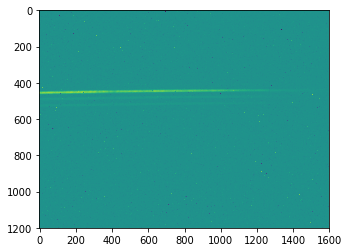

In [129]:
plt.imshow(combined_mirach)

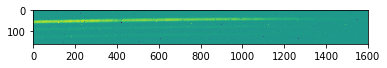

In [130]:
mirach_selection = combined_mirach[400:560, :]
plt.imshow(mirach_selection)

In [131]:
mirach_spec = np.sum(mirach_selection, axis=0)[::-1]

Text(0.5,0,'Wavelength [nm]')

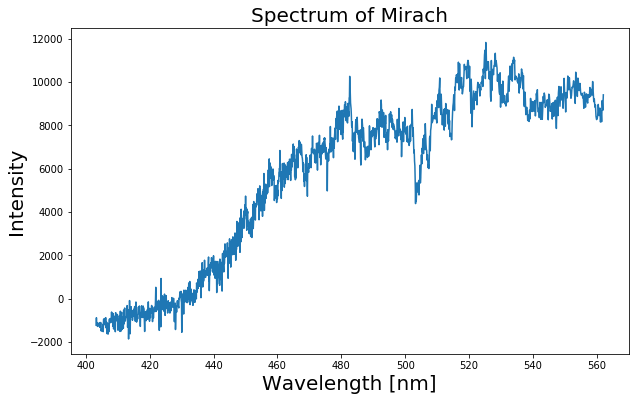

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(wavelength_sol(np.arange(len(mirach_spec))), mirach_spec)
plt.title("Spectrum of Mirach", fontsize=20)
plt.ylabel("Intensity", fontsize=20)
plt.xlabel("Wavelength [nm]", fontsize=20)

In [153]:
mirach_divided = np.divide(mirach_spec, deneb_spec)
mirach_calib = np.multiply(mirach_divided, deneb_bb.value)

Text(0.5,0,'Wavelength [nm]')

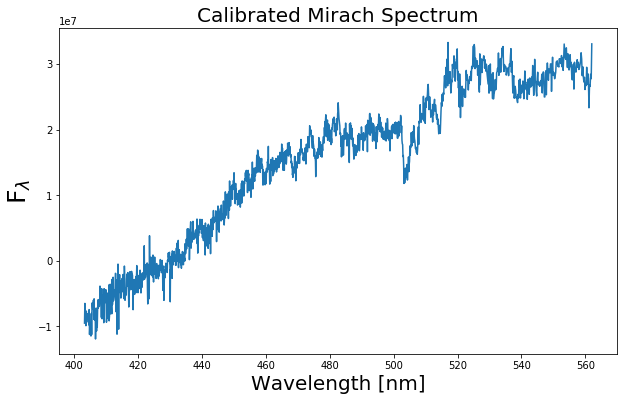

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(wavelength_sol(np.arange(len(mirach_spec))), mirach_calib)
plt.title("Calibrated Mirach Spectrum", fontsize=20)
plt.ylabel('F$_{\lambda}$', fontsize=25)
plt.xlabel("Wavelength [nm]", fontsize=20)

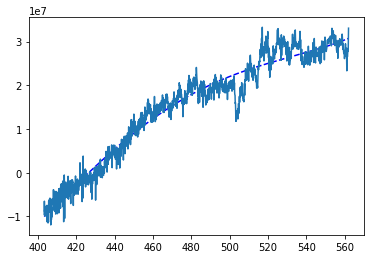

In [135]:
#remove continuum to measure centroids of absorption features
import numpy.polynomial.polynomial as poly
mirach_coefs = poly.polyfit(wavelength_sol(np.arange(len(mirach_spec))), mirach_calib,4)
mirach_fit = poly.polyval(wavelength_sol(np.arange(len(mirach_spec))), mirach_coefs)
plt.plot(wavelength_sol(np.arange(len(mirach_spec))), mirach_fit, ls='--', color='blue', lw=1.5)
plt.plot(wavelength_sol(np.arange(len(mirach_spec))), mirach_calib)

In [136]:
mirach_diff = mirach_calib - mirach_fit

Text(518,-5.5e+06,'Fit $\\lambda$ = 514 nm')

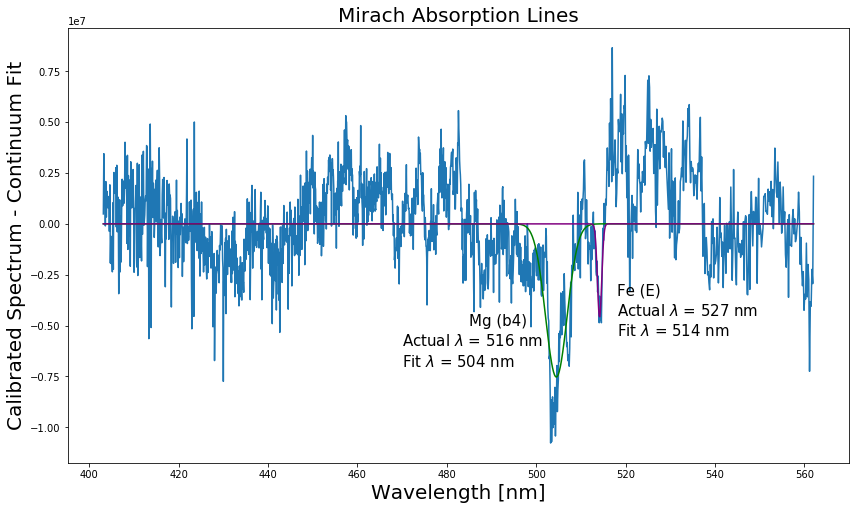

In [137]:
plt.figure(figsize=(14, 8))

x_mirach = wavelength_sol(np.arange(len(mirach_spec)))


def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2,mu3,A3,sigma3):
    return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2) + gaussian(x,mu3,A3,sigma3)

expected1 = (505, -0.8e7 , 5)
#expected2 = (523, -0.6e7, 1)
expected3 = (515, -0.5e7, 1)
params_mir1,cov_mir1 = curve_fit(gaussian, x_mirach, mirach_diff, expected1)
#params_mir2,cov_mir2 = curve_fit(gaussian, x_mirach, mirach_diff, expected2)
params_mir3,cov_mir3 = curve_fit(gaussian, x_mirach, mirach_diff, expected3)

fit_mir1 = gaussian(x_mirach, *params_mir1)
#fit_mir2 = gaussian(x_mirach, *params_al2)
fit_mir3 = gaussian(x_mirach, *params_mir3)
#plt.plot(x_al, fit_al1+fit_al2+fit_al3, color='red', ls = '--', lw = 1.5, label='Gaussian Fit')

plt.plot(x_mirach, mirach_diff, label='Data')
plt.plot(x_mirach, fit_mir1, color='green')
#plt.plot(x_mirach, fit_mir2, color='red')
plt.plot(x_mirach, fit_mir3, color='purple')

plt.ylabel('Calibrated Spectrum - Continuum Fit', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title('Mirach Absorption Lines', fontsize=20)

plt.annotate('Mg (b4)', xy=(485, -0.5e7), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 516 nm', xy=(470, -0.6e7), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 504 nm', xy=(470, -0.7e7), fontsize=15)
plt.annotate('Fe (E)', xy=(518, -0.35e7), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 527 nm', xy=(518, -0.45e7), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 514 nm', xy=(518, -0.55e7), fontsize=15)

In [138]:
params_mir1, params_mir3

(array([ 5.04518328e+02, -7.52868580e+06,  3.40021321e+00]),
 array([ 5.14191257e+02, -4.58599474e+06,  6.82652257e-01]))

In [139]:
#now try to reduce mirach and calibrate with deneb

dark_removed_mirphak = []
for image in mirphak_data_array:
    dark_removed_mirphak.append(image - dark_median_9)
#flattened_aldebaran = []
#for image in dark_removed_aldebaran:
#    flattened_aldebaran.append(image / flat_median)
    
    
combined_mirphak = np.sum(dark_removed_mirphak, axis=0)

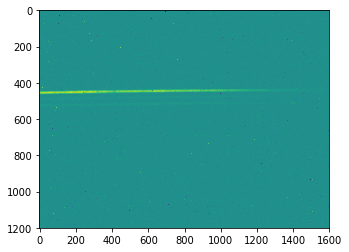

In [140]:
plt.imshow(combined_mirphak)

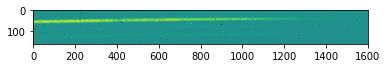

In [141]:
mirphak_selection = combined_mirphak[400:560, :]
plt.imshow(mirphak_selection)

In [142]:
mirphak_spec = np.sum(mirphak_selection, axis=0)[::-1]

Text(0.5,0,'Wavelength [nm]')

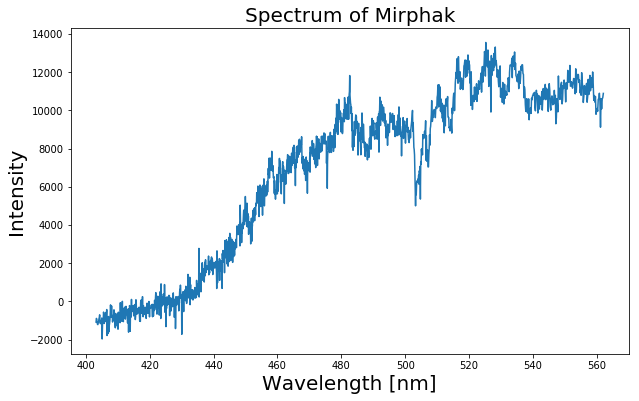

In [143]:
plt.figure(figsize=(10, 6))
plt.plot(wavelength_sol(np.arange(len(mirphak_spec))), mirphak_spec)
plt.title("Spectrum of Mirphak", fontsize=20)
plt.ylabel("Intensity", fontsize=20)
plt.xlabel("Wavelength [nm]", fontsize=20)

In [155]:
mirphak_divided = np.divide(mirphak_spec, deneb_spec)
mirphak_calib = np.multiply(mirphak_divided, deneb_bb.value)

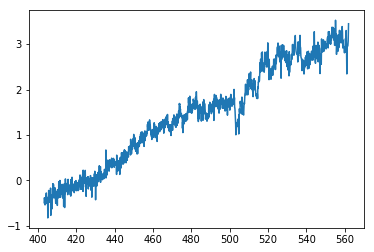

In [157]:
plt.plot(wavelength_sol(np.arange(len(mirphak_calib))), mirphak_divided)

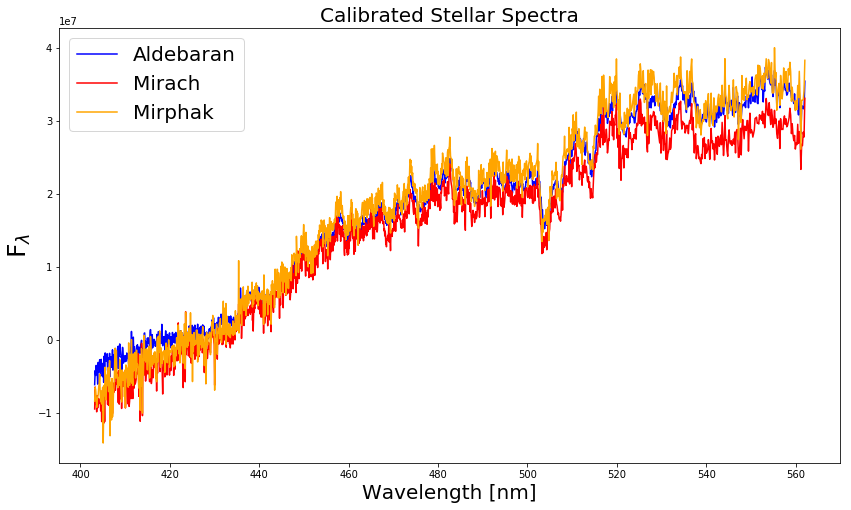

In [191]:
plt.figure(figsize=(14, 8))
plt.plot(wavelength_sol(np.arange(len(aldebaran_calib))), aldebaran_calib, color='blue', label='Aldebaran')
plt.plot(wavelength_sol(np.arange(len(mirach_calib))), mirach_calib, color='red', label='Mirach')
plt.plot(wavelength_sol(np.arange(len(mirphak_calib))), mirphak_calib, color='orange', label='Mirphak')
plt.title("Calibrated Stellar Spectra", fontsize=20)
plt.ylabel('F$_{\lambda}$', fontsize=25)
plt.xlabel("Wavelength [nm]", fontsize=20)

plt.legend(loc='upper left', fontsize=20)

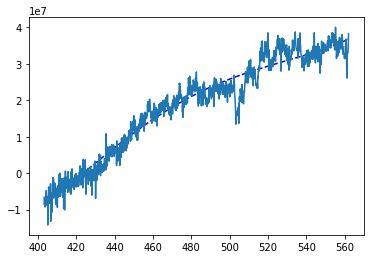

In [127]:
#remove continuum to measure centroids of absorption features
import numpy.polynomial.polynomial as poly
mirphak_coefs = poly.polyfit(wavelength_sol(np.arange(len(mirphak_spec))), mirphak_calib,4)
mirphak_fit = poly.polyval(wavelength_sol(np.arange(len(mirphak_spec))), mirphak_coefs)
plt.plot(wavelength_sol(np.arange(len(mirphak_spec))), mirphak_fit, ls='--', color='blue', lw=1.5)
plt.plot(wavelength_sol(np.arange(len(mirphak_spec))), mirphak_calib)

In [128]:
mirphak_diff = mirphak_calib - mirphak_fit

Text(517,-6.5e+06,'Fit $\\lambda$ = 514 nm')

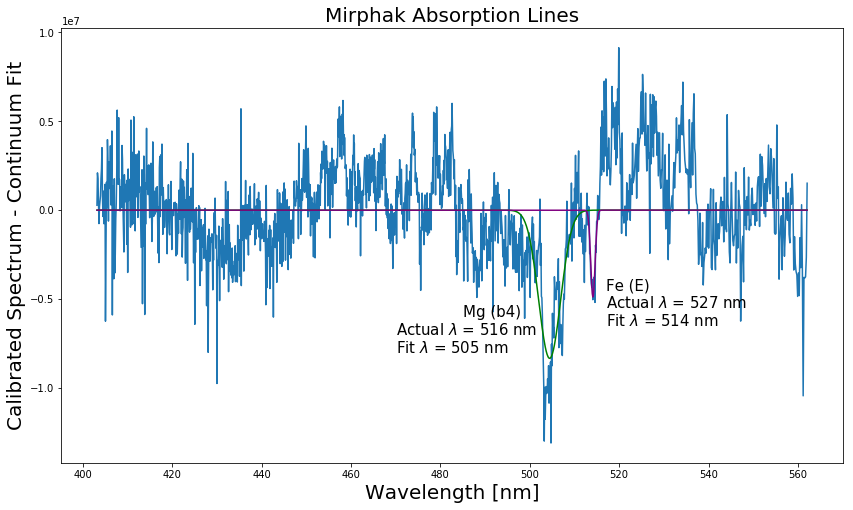

In [141]:
plt.figure(figsize=(14, 8))

x_mirphak = wavelength_sol(np.arange(len(mirphak_spec)))


def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def gauss_sum(x,mu1,A1,sigma1,mu2,A2,sigma2,mu3,A3,sigma3):
    return gaussian(x,mu1,A1,sigma1) + gaussian(x,mu2,A2,sigma2) + gaussian(x,mu3,A3,sigma3)

expected1 = (505, -0.8e7 , 5)
#expected2 = (523, -0.6e7, 1)
expected3 = (515, -0.5e7, 1)
params_mirf1,cov_mirf1 = curve_fit(gaussian, x_mirphak, mirphak_diff, expected1)
#params_mir2,cov_mir2 = curve_fit(gaussian, x_mirach, mirach_diff, expected2)
params_mirf3,cov_mirf3 = curve_fit(gaussian, x_mirphak, mirphak_diff, expected3)

fit_mirf1 = gaussian(x_mirphak, *params_mirf1)
#fit_mir2 = gaussian(x_mirach, *params_al2)
fit_mirf3 = gaussian(x_mirphak, *params_mirf3)
#plt.plot(x_al, fit_al1+fit_al2+fit_al3, color='red', ls = '--', lw = 1.5, label='Gaussian Fit')

plt.plot(x_mirphak, mirphak_diff, label='Data')
plt.plot(x_mirphak, fit_mirf1, color='green')
#plt.plot(x_mirach, fit_mir2, color='red')
plt.plot(x_mirphak, fit_mirf3, color='purple')

plt.ylabel('Calibrated Spectrum - Continuum Fit', fontsize=20)
plt.xlabel('Wavelength [nm]', fontsize=20)
plt.title('Mirphak Absorption Lines', fontsize=20)

plt.annotate('Mg (b4)', xy=(485, -0.6e7), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 516 nm', xy=(470, -0.7e7), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 505 nm', xy=(470, -0.8e7), fontsize=15)
plt.annotate('Fe (E)', xy=(517, -0.45e7), fontsize=15)
plt.annotate(r'Actual $\lambda$ = 527 nm', xy=(517, -0.55e7), fontsize=15)
plt.annotate(r'Fit $\lambda$ = 514 nm', xy=(517, -0.65e7), fontsize=15)

In [140]:
params_mirf1, params_mirf3

(array([ 5.04451063e+02, -8.33809906e+06,  3.47902782e+00]),
 array([ 5.14133193e+02, -4.89277990e+06,  6.93970262e-01]))